Data Preprocessing


Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

Steps in Data processing-
Step 1 : Import the necessary libraries


In [27]:
import numpy as np
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Step 2 : Load the dataset

In [5]:
Pima_dataset = pd.read_csv('ML/diabetes.csv')
print(Pima_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
Pima_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Step 3 : Statstical Analysis

In [9]:
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's plot the boxplot for each coloumn 

Step 4 : Check the outliers 

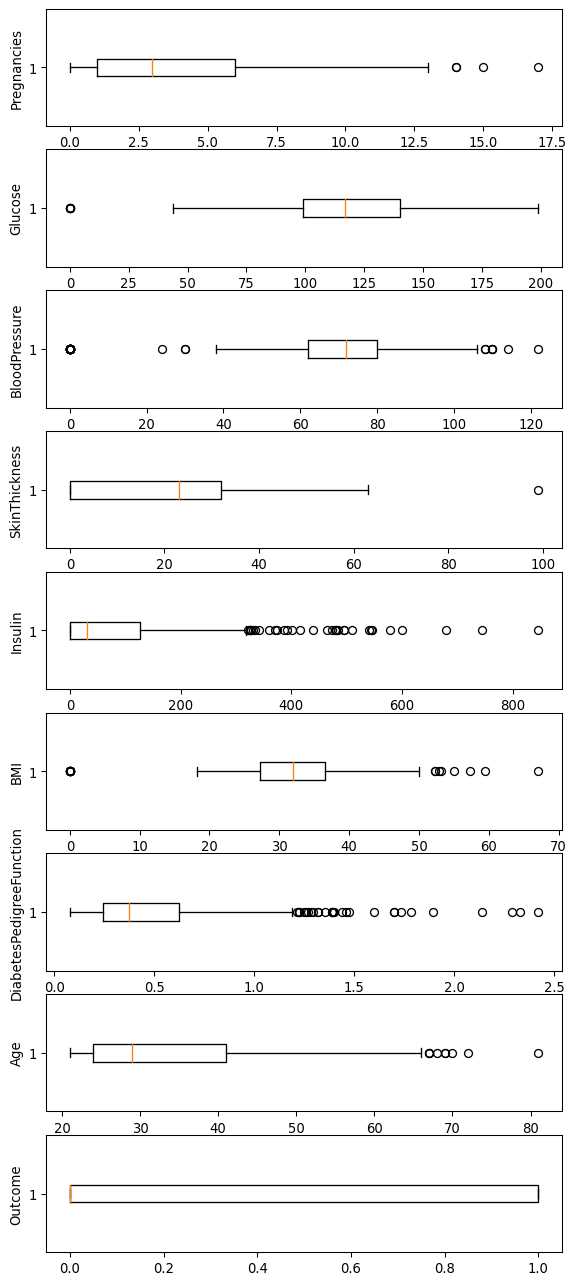

In [11]:
#Box plot
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i=0
for col in Pima_dataset.columns:
    axs[i].boxplot(Pima_dataset[col] , vert =False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Drop the outliers:

In [19]:
#Identify the quartiles
q1 , q3 = np.percentile(Pima_dataset['Insulin'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = Pima_dataset[(Pima_dataset['Insulin'] >= lower_bound) & (Pima_dataset['Insulin'] <= upper_bound)] 

#Identify the quartiles
q1 , q3 = np.percentile(clean_data['Pregnancies'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['Pregnancies']>=lower_bound) & (clean_data['Pregnancies']<=upper_bound)] 

#Identify the quartiles
q1 , q3 = np.percentile(clean_data['SkinThickness'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['SkinThickness']>=lower_bound) & (clean_data['SkinThickness']<=upper_bound)]
                                     
#Identify the quartiles
q1 , q3 = np.percentile(clean_data['BloodPressure'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['BloodPressure']>=lower_bound) & (clean_data['BloodPressure']<=upper_bound)] 

#Identify the quartiles
q1 , q3 = np.percentile(clean_data['Glucose'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['Glucose']>=lower_bound) & (clean_data['Glucose']<=upper_bound)]

#Identify the quartiles
q1 , q3 = np.percentile(clean_data['BMI'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['BMI']>=lower_bound) & (clean_data['BMI']<=upper_bound)]
                                    
#Identify the quartiles
q1 , q3 = np.percentile(clean_data['Age'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['Age']>=lower_bound) & (clean_data['Age']<=upper_bound)]
                                     
#Identify the quartiles
q1 , q3 = np.percentile(clean_data['DiabetesPedigreeFunction'],[25,75])
# calculate the interquartile range 
iqr = q3-q1
#calculate the lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#Drop the outliers 
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction']>=lower_bound) & (clean_data['DiabetesPedigreeFunction']<=upper_bound)]





Step 5 : Correlation (https://www.datacamp.com/tutorial/tutorial-datails-on-correlation)

Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

First, it is a key component in data exploratory analysis
Second, correlations have many real-world applications. They can help us answer questions, such as whether there is a link between democracy and economic growth, or whether the use of cars correlates to the level of air pollution.
Finally, the study of correlation is critical in the field of machine learning. For example, some algorithms will not work properly if two or more variables are closely related, usually known as multicollinearity

we wanted to explore the correlation between all the pairs of variables, we could simply use the .corr() method directly to our DataFrame, which results again in a correlation matrix with the coefficient of all the pairs of variables.To extract the insights of our matrix in a more effective way, we could use a heatmap; a data visualization technique where each value is represented by a color, according to its intensity in a given scale.

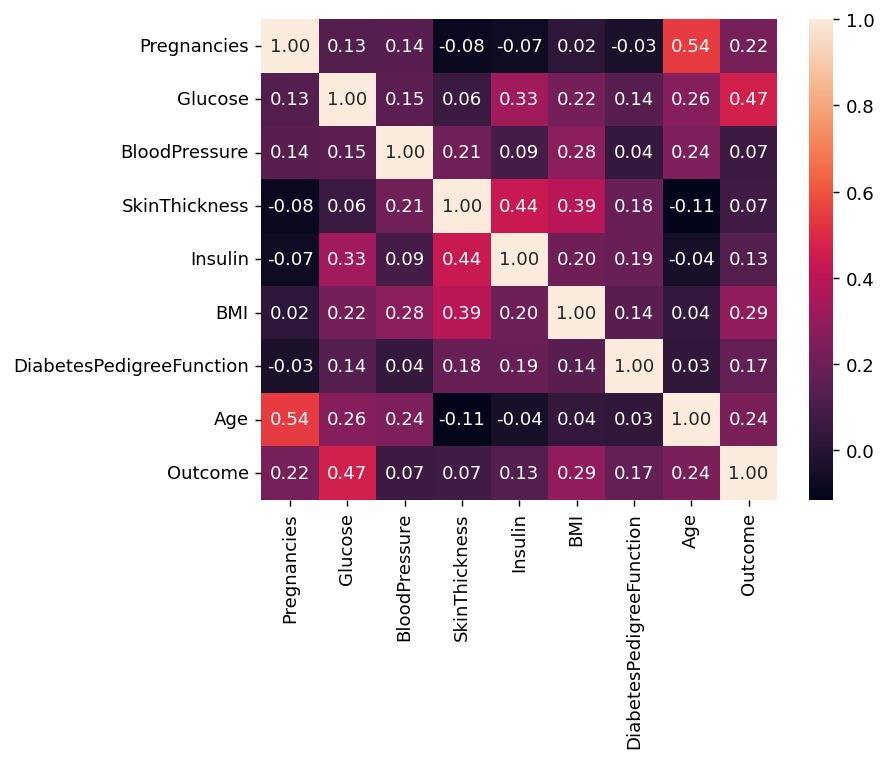

In [21]:
#correlation
corr = Pima_dataset.corr()
plt.figure(dpi = 130)
sns.heatmap(Pima_dataset.corr(), annot= True, fmt='.2f')
plt.show()

In [22]:
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

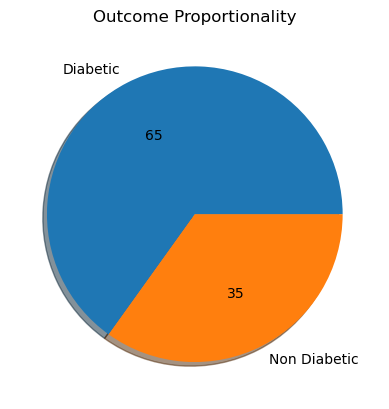

In [24]:
#check outcome proportionality 

plt.pie(Pima_dataset.Outcome.value_counts(), labels = ['Diabetic','Non Diabetic'], autopct='%.f' , shadow=True)
plt.title('Outcome Proportionality')
plt.show()

Step 6 : Separate Independent features and target variables 

In [25]:
#separate into input and output
X = Pima_dataset.drop(columns= ['Outcome'])
Y= Pima_dataset.Outcome

Step 7 : Normalization and Standardization

Normalization : MinMaxScaler scales the data so that each feature is in the range [0, 1]. 
It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.

In [26]:
#Initialising the MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = Scaler.fit_transform(X)
rescaledX[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

Standardization (https://www.analyticsvidhya.com/blog/2022/10/understand-the-concept-of-standardization-in-machine-learning/)

: Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
We can standardize data using scikit-learn with the StandardScaler class.
It works well when the features have a normal distribution or when the algorithm being used is not sensitive to the scale of the features


In [42]:
# fit the scaler, it will learn the parameters 
Scaler = StandardScaler().fit(X)
#transform set
rescaledX = Scaler.transform(X)
rescaledX[:5]
Xscaled = pd.DataFrame(rescaledX , columns = X.columns)

There will always be a debate about whether to do a train test split before doing standard scaling or not, but in my preference, it is essential to do this step before standardization as if we scale the whole data, then for our algorithm, there might be no testing data left which will eventually lead to overfitting condition. On the other hand now if we only scale our training data then we will still have the testing data which is unseen for the model.

In [41]:
X.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [43]:
Xscaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00
